# Example Notebook

In [1]:
from pynwb import NWBHDF5IO
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
from pathlib import Path
import sys
import networkx as nx
import pandas as pd

dj_local_conf_path = "/Users/pauladkisson/Documents/CatalystNeuro/JadhavConv/jadhav-lab-to-nwb/src/jadhav_lab_to_nwb/spyglass_mock/dj_local_conf.json"
dj.config.load(dj_local_conf_path)  # load config for database connection info

# General Spyglass Imports
import spyglass.common as sgc  # this import connects to the database
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename

# DLC Imports
from spyglass.position.v1.imported_pose import ImportedPose

# Custom Table Imports
sys.path.append(
    "/Users/pauladkisson/Documents/CatalystNeuro/JadhavConv/jadhav-lab-to-nwb/src/jadhav_lab_to_nwb/spyglass_extensions"
)
from task_leds import TaskLEDs

[2025-07-02 10:16:42,772][INFO]: DataJoint is configured from /Users/pauladkisson/Documents/CatalystNeuro/JadhavConv/jadhav-lab-to-nwb/src/jadhav_lab_to_nwb/spyglass_mock/dj_local_conf.json
[2025-07-02 10:16:42,907][INFO]: DataJoint 0.14.4 connected to root@localhost:3306


This notebook showcases the example sessions from the rivera_and_shukla_2025 dataset containing social behavior and concurrent pose estimation.

All data is loaded from the spyglass database.
In order to run this notebook, please ensure that data has been inserted into the database using the `rivera_and_shukla_2025_insert_all_sessions.py` script.

In [2]:
sgc.Session()

nwb_file_name name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
sub-XFN1_ses-07-15-2023-100_.nwb,XFN1,Brandeis University,Jadhav,07-15-2023-100,Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.,2023-07-15 00:00:00,2023-07-15 00:00:00,"Pro-social behaviors involve affiliative social interactions between individuals aimed at either mutual benefits for individuals involved or benefiting others. These behaviors are essential for social cohesiveness and well-being of social species. Individuals with autism spectrum disorders have severe cognitive and social deficits. However, little is known about the underlying causes and neural mechanisms associated with these deficits. Our study involves looking into the behavior of wild-type and Fmr1-/y rat pairs on W mazes where they are required to cooperate in order to get a joint reward."
sub-XFN1_ses-07-20-2023-100_.nwb,XFN1,Brandeis University,Jadhav,07-20-2023-100,Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.,2023-07-20 00:00:00,2023-07-20 00:00:00,"Pro-social behaviors involve affiliative social interactions between individuals aimed at either mutual benefits for individuals involved or benefiting others. These behaviors are essential for social cohesiveness and well-being of social species. Individuals with autism spectrum disorders have severe cognitive and social deficits. However, little is known about the underlying causes and neural mechanisms associated with these deficits. Our study involves looking into the behavior of wild-type and Fmr1-/y rat pairs on W mazes where they are required to cooperate in order to get a joint reward."
sub-XFN1_ses-07-27-2023-100_.nwb,XFN1,Brandeis University,Jadhav,07-27-2023-100,Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.,2023-07-27 00:00:00,2023-07-27 00:00:00,"Pro-social behaviors involve affiliative social interactions between individuals aimed at either mutual benefits for individuals involved or benefiting others. These behaviors are essential for social cohesiveness and well-being of social species. Individuals with autism spectrum disorders have severe cognitive and social deficits. However, little is known about the underlying causes and neural mechanisms associated with these deficits. Our study involves looking into the behavior of wild-type and Fmr1-/y rat pairs on W mazes where they are required to cooperate in order to get a joint reward."
sub-XFN1_ses-08-07-2023-100_.nwb,XFN1,Brandeis University,Jadhav,08-07-2023-100,Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.,2023-08-07 00:00:00,2023-08-07 00:00:00,"Pro-social behaviors involve affiliative social interactions between individuals aimed at either mutual benefits for individuals involved or benefiting others. These behaviors are essential for social cohesiveness and well-being of social species. Individuals with autism spectrum disorders have severe cognitive and social deficits. However, little is known about the underlying causes and neural mechanisms associated with these deficits. Our study involves looking into the behavior of wild-type and Fmr1-/y rat pairs on W mazes where they are required to cooperate in order to get a joint reward."
sub-XFN1_ses-08-08-2023-50_.nwb,XFN1,Brandeis University,Jadhav,08-08-2023-50,Rats performed 

# Single-session analysis

We will start by looking at a single example session

In [3]:
nwb_file_name = get_nwb_copy_filename("sub-XFN1_ses-07-20-2023-100.nwb")
sgc.Session() & {"nwb_file_name": nwb_file_name}

nwb_file_name name of the NWB file,subject_id,institution_name,lab_name,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description
sub-XFN1_ses-07-20-2023-100_.nwb,XFN1,Brandeis University,Jadhav,07-20-2023-100,Rats performed a cooperative maze task in which a pair of rats must cooperate by picking the same well in order to get a joint reward. Rewards were delivered 100% of the time when both rats poked the same well.,2023-07-20 00:00:00,2023-07-20 00:00:00,"Pro-social behaviors involve affiliative social interactions between individuals aimed at either mutual benefits for individuals involved or benefiting others. These behaviors are essential for social cohesiveness and well-being of social species. Individuals with autism spectrum disorders have severe cognitive and social deficits. However, little is known about the underlying causes and neural mechanisms associated with these deficits. Our study involves looking into the behavior of wild-type and Fmr1-/y rat pairs on W mazes where they are required to cooperate in order to get a joint reward."


By looking at the subject table, we can see that our subject is 3-5 months old with the experimental knockout genotype. 

In [4]:
sgc.Subject()

subject_id,age,description,genotype,sex,species
XFN1,P3M/P5M,Long Evans Rat,Fmr1-/y,M,Rattus norvegicus
XFN2,P3M/P5M,Long Evans Rat,WT,M,Rattus norvegicus
XFN3,P3M/P5M,Long Evans Rat,Fmr1-/y,M,Rattus norvegicus
XFN4,P3M/P5M,Long Evans Rat,WT,M,Rattus norvegicus


By looking at the TaskEpoch table, we can see the 5 odd-numbered epochs. 

In [5]:
sgc.TaskEpoch & {"nwb_file_name": nwb_file_name}

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),task_name,camera_name,interval_list_name descriptive name of this interval list,task_environment the environment the animal was in,camera_names list of keys corresponding to entry in CameraDevice
sub-XFN1_ses-07-20-2023-100_.nwb,1,SocialW_Left,None,01,left_Wmaze,=BLOB=
sub-XFN1_ses-07-20-2023-100_.nwb,3,SocialW_Right,None,03,right_Wmaze,=BLOB=
sub-XFN1_ses-07-20-2023-100_.nwb,5,SocialW_Left,None,05,left_Wmaze,=BLOB=
sub-XFN1_ses-07-20-2023-100_.nwb,7,SocialW_Right,None,07,right_Wmaze,=BLOB=
sub-XFN1_ses-07-20-2023-100_.nwb,9,SocialW_Left,None,09,left_Wmaze,=BLOB=


This table references interval lists which contain the actual start time and stop time of each of these epochs.
Let's look at the first epoch. 

In [6]:
start_time, stop_time = (sgc.IntervalList & {"nwb_file_name": nwb_file_name, "interval_list_name": "01"}).fetch1("valid_times")[0]
print(f"Start time: {start_time}, Stop time: {stop_time}")

Start time: 863.958, Stop time: 2098.063


Now let's get the behavioral data for this session. 

In [7]:
sgc.DIOEvents & {"nwb_file_name": nwb_file_name}

nwb_file_name name of the NWB file,dio_event_name the name assigned to this DIO event,dio_object_id the object id of the data in the NWB file,interval_list_name descriptive name of this interval list
sub-XFN1_ses-07-20-2023-100_.nwb,matched_poke_A1,c60a46e9-ca3a-405d-965b-11cf26ed3c9e,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,matched_poke_B2,c90a5942-ead8-4522-810e-1ed0854cb8fd,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,matched_poke_C3,41a43733-4f4b-426c-9b08-e0004703f1fa,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,rewarded_poke,dddfba99-8c6c-4a79-9a32-c17afa9a3c7c,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,reward_well_1,ea3cc475-f1bd-43d5-98ee-0a8987a2a4f3,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,reward_well_2,74e1cdeb-4f62-4910-b68c-4acdc48eb1f5,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,reward_well_3,6babe3f2-0287-4fc2-9a03-42afe4650888,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,reward_well_A,be60abf3-c6a1-408e-9f68-28a7cf9bf0fd,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,reward_well_B,810c891b-119b-4fa0-8d0c-68e856fc53e9,dio data valid times
sub-XFN1_ses-07-20-2023-100_.nwb,reward_well_C,89efe11c-6041-435a-9a40-5ca9530b76c7,dio data valid times


In [8]:
dio_event_names = [
    "matched_poke_A1",
    "matched_poke_B2",
    "matched_poke_C3",
    "reward_well_1",
    "reward_well_2",
    "reward_well_3",
    "reward_well_A",
    "reward_well_B",
    "reward_well_C",
    "rewarded_poke",
]
event_name_to_timestamps = {}
for dio_event_name in dio_event_names:
    timestamps = (sgc.DIOEvents & {"nwb_file_name": nwb_file_name, "dio_event_name": dio_event_name}).fetch_nwb()[0]["dio"].timestamps[:]
    event_name_to_timestamps[dio_event_name] = timestamps

Let's plot just the behavioral data for epoch 1

In [9]:
event_name_to_timestamps_epoch_1 = {}
for dio_event_name, timestamps in event_name_to_timestamps.items():
    event_name_to_timestamps_epoch_1[dio_event_name] = timestamps[(timestamps >= start_time) & (timestamps <= stop_time)]

In [10]:
def plot_behavior(axs, matched_poke_A1, matched_poke_B2, matched_poke_C3, 
                  reward_well_1, reward_well_2, reward_well_3,
                  reward_well_A, reward_well_B, reward_well_C, rewarded_poke):
    """
    Plot behavioral events on multiple subplots.
    
    Parameters:
    -----------
    axs : array of matplotlib axes
        Array of 4 subplot axes for plotting different behavioral events
    matched_poke_A1, matched_poke_B2, matched_poke_C3 : array-like
        Timestamps for matched poke events
    reward_well_1, reward_well_2, reward_well_3 : array-like
        Timestamps for reward well events (numbered)
    reward_well_A, reward_well_B, reward_well_C : array-like
        Timestamps for reward well events (lettered)
    rewarded_poke : array-like
        Timestamps for rewarded poke events
    """
    
    # Plot matched pokes
    axs[0].stem(matched_poke_A1, np.ones_like(matched_poke_A1), linefmt='r-', markerfmt='ro', basefmt=' ', label='Matched Poke A1')
    axs[0].stem(matched_poke_B2, np.ones_like(matched_poke_B2)*1.2, linefmt='g-', markerfmt='go', basefmt=' ', label='Matched Poke B2')
    axs[0].stem(matched_poke_C3, np.ones_like(matched_poke_C3)*1.4, linefmt='b-', markerfmt='bo', basefmt=' ', label='Matched Poke C3')
    
    # Plot reward wells 1-3
    axs[1].stem(reward_well_1, np.ones_like(reward_well_1), linefmt='r-', markerfmt='rs', basefmt=' ', label='Reward Well 1')
    axs[1].stem(reward_well_2, np.ones_like(reward_well_2)*1.2, linefmt='g-', markerfmt='gs', basefmt=' ', label='Reward Well 2')
    axs[1].stem(reward_well_3, np.ones_like(reward_well_3)*1.4, linefmt='b-', markerfmt='bs', basefmt=' ', label='Reward Well 3')
    
    # Plot reward wells A-C
    axs[2].stem(reward_well_A, np.ones_like(reward_well_A), linefmt='r-', markerfmt='r^', basefmt=' ', label='Reward Well A')
    axs[2].stem(reward_well_B, np.ones_like(reward_well_B)*1.2, linefmt='g-', markerfmt='g^', basefmt=' ', label='Reward Well B')
    axs[2].stem(reward_well_C, np.ones_like(reward_well_C)*1.4, linefmt='b-', markerfmt='b^', basefmt=' ', label='Reward Well C')
    
    # Plot rewarded pokes
    axs[3].stem(rewarded_poke, np.ones_like(rewarded_poke), linefmt='k-', markerfmt='ko', basefmt=' ', label='Rewarded Poke')
    
    for i, ax in enumerate(axs):
        ax.set_ylim([0, 2])
        ax.set_yticks([])
        ax.legend(loc='upper right', fontsize='small')
    
    axs[-1].set_xlabel('Time (s)')
    axs[0].set_ylabel('Matched Pokes')
    axs[1].set_ylabel('Reward Wells 1-3')
    axs[2].set_ylabel('Reward Wells A-C')
    axs[3].set_ylabel('Rewarded Pokes')

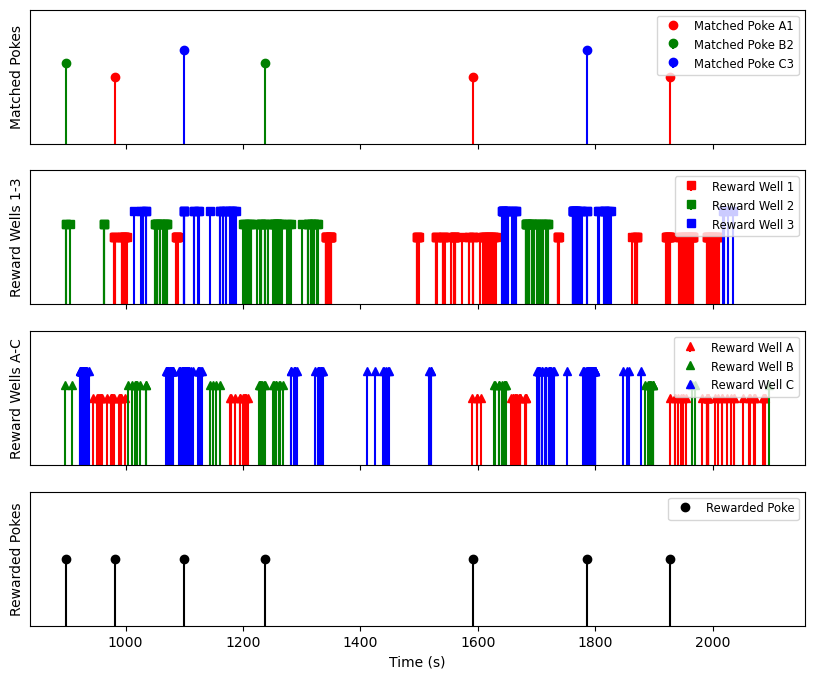

In [11]:
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
plot_behavior(
    axs,
    event_name_to_timestamps_epoch_1['matched_poke_A1'],
    event_name_to_timestamps_epoch_1['matched_poke_B2'],
    event_name_to_timestamps_epoch_1['matched_poke_C3'],
    event_name_to_timestamps_epoch_1['reward_well_1'],
    event_name_to_timestamps_epoch_1['reward_well_2'],
    event_name_to_timestamps_epoch_1['reward_well_3'],
    event_name_to_timestamps_epoch_1['reward_well_A'],
    event_name_to_timestamps_epoch_1['reward_well_B'],
    event_name_to_timestamps_epoch_1['reward_well_C'],
    event_name_to_timestamps_epoch_1['rewarded_poke'],
)

Now, let's get Pose estimation data for epoch 1.

In [12]:
ImportedPose & {"nwb_file_name": nwb_file_name}

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,pose_object_id unique identifier for the pose object,skeleton_object_id unique identifier for the skeleton object
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_1-XFN1-1_valid_intervals,0c5b3e73-82d7-4a46-a5ee-335d3122c949,b72cf152-d431-45fa-a80f-e92f8a0d243e
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_1-XFN3-1_valid_intervals,2449249f-e980-4693-b3c2-d3f34f332252,f901c48b-7ec1-496d-bfa0-9a72bde2bedc
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_3-XFN1-1_valid_intervals,824e4650-4f2d-4f3b-8ed3-2d1634945229,ed7a31b4-2ef1-4614-bd4c-0bfb7608862d
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_3-XFN3-1_valid_intervals,6e956609-6356-4a73-a2f0-05274e9ab7dd,c40b5f09-267c-4431-81a0-ed08b0dbeadb
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_5-XFN1-1_valid_intervals,d58025c2-f34a-4052-8e95-27f6df97de40,263788b8-7c52-4602-8828-42b873536969
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_5-XFN3-1_valid_intervals,4306b1fe-de18-4136-9720-5f2c81367362,a5bd69b8-5b2f-45c1-b07a-15cbf5079bf7
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_7-XFN1-1_valid_intervals,c27d9956-9803-4d8b-a1d0-286f9f289bc9,cc1ee85f-3506-4d1b-a149-72a8bbb483e3
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_7-XFN3-1_valid_intervals,51ac791a-37e2-489d-897b-b87d52e77b25,5e92e8e4-a183-42b4-820a-673a4239087e
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_9-XFN1-1_valid_intervals,66a91d1a-84b9-43bd-b9df-9f53ed1917a4,42e0dbf7-65d5-43c0-a128-bb39433a2fd4
sub-XFN1_ses-07-20-2023-100_.nwb,pose_PoseEstimation_9-XFN3-1_valid_intervals,c64e9aaf-46d6-416d-b694-b43de5af7bde,ab588a8f-c2ef-421a-b038-4ba9ffd65c4e


In [13]:
pose_estimation = (ImportedPose & {"nwb_file_name": nwb_file_name, "interval_list_name": "pose_PoseEstimation_1-XFN1-1_valid_intervals"}).fetch_nwb()[0]["pose"]
        
nodes = pose_estimation.nodes[:]
edges = pose_estimation.edges[:]
pes = pose_estimation.pose_estimation_series
name_to_data = {name: series.data[:] for name, series in pes.items()}
pes_timestamps = pes["PoseEstimationSeriesBody center"].timestamps[:]
node_to_name = {node: f"PoseEstimationSeries{node.capitalize()}" for node in nodes}

And we can plot it

In [14]:
def plot_pose_estimation(nodes, edges, name_to_data, node_to_name, timestamps):
    """
    Plot pose estimation data with trajectory and skeleton structure.
    
    Parameters:
    -----------
    nodes : array-like
        Node names for the pose estimation skeleton
    edges : array-like
        Edge connections between nodes
    name_to_data : dict
        Dictionary mapping node names to position data
    node_to_name : dict
        Dictionary mapping node indices to series names
    timestamps : array-like
        Timestamps for the pose estimation data
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Average position scatter plot with trajectory
    all_x = np.array([name_to_data[node_to_name[node]][:, 0] for node in nodes])
    all_y = np.array([name_to_data[node_to_name[node]][:, 1] for node in nodes])

    x = np.nanmean(all_x, axis=0)
    y = np.nanmean(all_y, axis=0)

    sc = ax1.scatter(x, y, c=timestamps, cmap='viridis', s=1)
    ax1.set_xlabel('X Position')
    ax1.set_ylabel('Y Position')
    ax1.set_title('Average Position Trajectory')
    plt.colorbar(sc, ax=ax1, label='Time (s)')
    
    # Right plot: Network graph using networkx
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes
    for i, node in enumerate(nodes):
        G.add_node(i, label=node)
    
    # Add edges
    for edge in edges:
        G.add_edge(edge[0], edge[1])
    
    # Create layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the network
    nx.draw(G, pos, ax=ax2, with_labels=True, 
            labels={i: nodes[i] for i in range(len(nodes))},
            node_color='lightblue', node_size=1000, 
            font_size=10, font_weight='bold',
            edge_color='gray', width=2)
    
    ax2.set_title('Pose Estimation Skeleton Structure')
    ax2.axis('off')
    
    plt.tight_layout()

    return fig, (ax1, ax2)

/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_50986/468386134.py:24: RuntimeWarning: Mean of empty slice
  x = np.nanmean(all_x, axis=0)
/var/folders/s3/qb42pmpn5jd0xb6fm2gt65qm0000gn/T/ipykernel_50986/468386134.py:25: RuntimeWarning: Mean of empty slice
  y = np.nanmean(all_y, axis=0)


(<Figure size 2000x800 with 3 Axes>,
 (<Axes: title={'center': 'Average Position Trajectory'}, xlabel='X Position', ylabel='Y Position'>,
  <Axes: title={'center': 'Pose Estimation Skeleton Structure'}>))

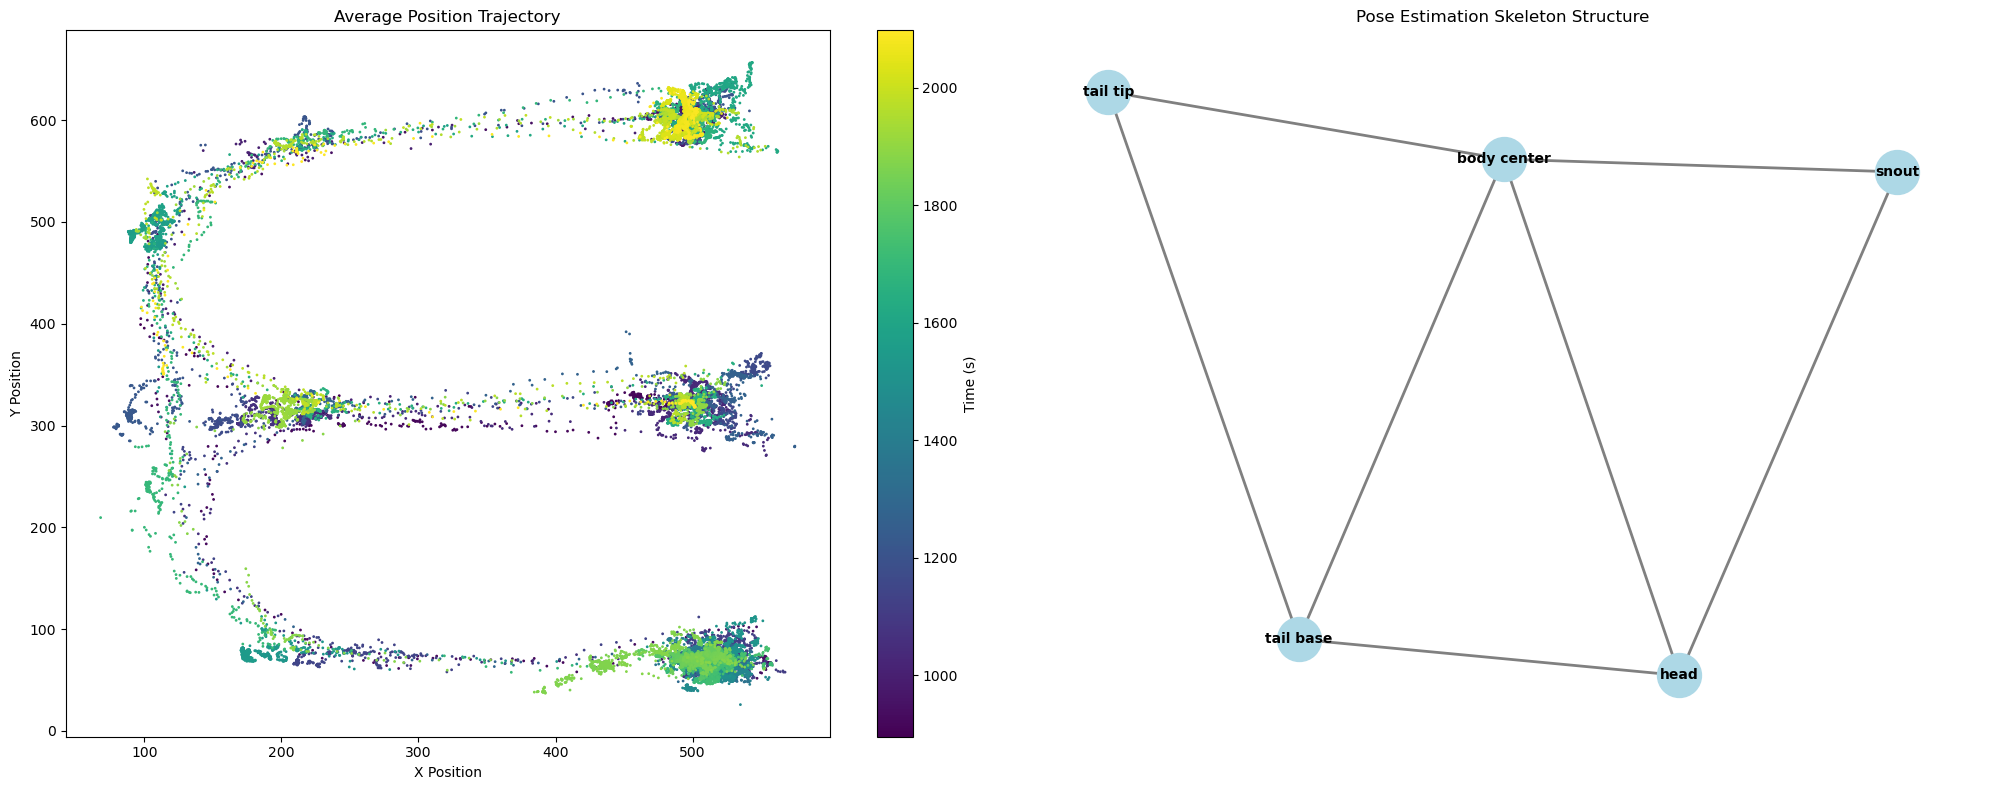

In [15]:
plot_pose_estimation(nodes, edges, name_to_data, node_to_name, pes_timestamps)

# Cross-session analysis

One of the main advantages of Spyglass is the ability to index the dataset across multiple sessions. 

To demonstrate this, we will show the distribution of reward_well_1 pokes across all sessions.

In [16]:
reward_well_1_events = (sgc.DIOEvents & {"dio_event_name": "reward_well_1"}).fetch_nwb()
nwb_file_name_to_num_pokes = {}
for event_dict in reward_well_1_events:
    num_pokes = event_dict["dio"].timestamps.shape[0]
    nwb_file_name = event_dict["nwb_file_name"]
    nwb_file_name_to_num_pokes[nwb_file_name] = num_pokes

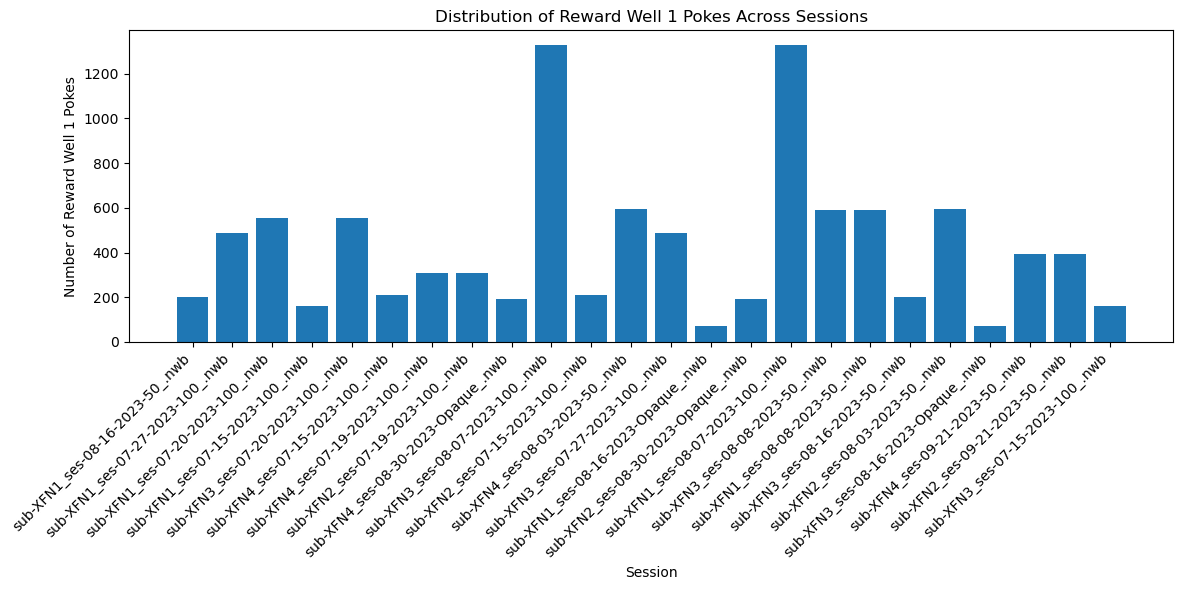

In [17]:
plt.figure(figsize=(12, 6))
sessions = list(nwb_file_name_to_num_pokes.keys())
num_pokes = list(nwb_file_name_to_num_pokes.values())

plt.bar(range(len(sessions)), num_pokes)
plt.xticks(range(len(sessions)), sessions, rotation=45, ha='right')
plt.ylabel('Number of Reward Well 1 Pokes')
plt.xlabel('Session')
plt.title('Distribution of Reward Well 1 Pokes Across Sessions')
plt.tight_layout()
plt.show()